In [1]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
from collections import deque
import matplotlib.pyplot as plt

from mazelib import Maze
from mazelib.generate.BacktrackingGenerator import BacktrackingGenerator

from tqdm import tqdm

from IPython.display import clear_output

In [35]:
# m = Maze()
# m.generator = BacktrackingGenerator(10 // 2 + 1, 10 // 2 + 1)  # 10x10 grid maze
# m.generate()
# default_maze_array = np.array(m.grid, dtype=np.float32)

# default_maze_array = np.array([
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
#     [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
#     [1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.],
#     [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
#     [1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
#     [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
#     [1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
#     [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
#     [1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
#     [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
# ])

# default_maze_array = np.array([
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
#     [1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
#     [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
#     [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
#     [1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.],
#     [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
#     [1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
#     [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
# ])

# default_maze_array = np.array([
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
#     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
# ])

In [36]:
def shortest_path(maze, start, goal):
    
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        # Get the dimensions of the maze
        
        rows, cols = len(maze), len(maze[0])
        
        # Initialize a queue for BFS and a set for visited cells
        queue = deque([(start, [start])])  # stores (current_position, path_taken)
        visited = set()
        visited.add(start)
        
        while queue:
            current, path = queue.popleft()
            
            # If we reach the goal, return the path
            if current == goal:
                return path
            
            # Explore the neighbors (up, down, left, right)
            for direction in directions:
                new_row, new_col = current[0] + direction[0], current[1] + direction[1]
                
                # Check if the new position is within bounds and is not a wall
                new_position = (new_row, new_col)
                if 0 <= new_row < rows and 0 <= new_col < cols and (maze[new_row][new_col] == 0 or new_position == goal):
                    
                    # If the position hasn't been visited, add to the queue
                    if new_position not in visited:
                        visited.add(new_position)
                        queue.append((new_position, path + [new_position]))
        
        return None  # If no path is found
        


class GridMazeEnv(gym.Env):
    def __init__(self, size=5, start=None, goal=None):
        super(GridMazeEnv, self).__init__()
        self.size = size
        
        self.action_space = spaces.Discrete(4)  # 0: Up, 1: Down, 2: Left, 3: Right
        self.observation_space = spaces.Box(
            low=0, high=np.inf, 
            # shape=(2 + 2 + (size - size%2 + 3)**2,), 
            shape=(2 + 2,), 
            dtype=np.float32
        )
        
        self.m = Maze()
        self.m.generator = BacktrackingGenerator(self.size // 2 + 1, self.size // 2 + 1)
    
    def generate_solvable_maze(self):
        
        # self.m.generate()
        # maze_array = np.array(self.m.grid, dtype=np.float32)
        maze_array = default_maze_array
        return maze_array
    
    def vectorize_state(self, state):
        vec = []
        for k, v in state.items():
            if not isinstance(v, np.ndarray):
                v = np.array(v)
            vec.append(v.reshape(-1))
        vec = np.concatenate(vec)
        return vec
    
    def reset(self, seed=None, options=None):
        self.grid = self.generate_solvable_maze()
        
        start, goal = None, None
        # start, goal = (0, 0), (10, 10)
        if start is None:
            start = (random.randint(0, self.size//2*2), random.randint(0, self.size//2*2))
        
        if goal is None:
            goal = (random.randint(0, self.size//2*2), random.randint(0, self.size//2*2))
            
        self.start = (start[0]+1, start[1]+1)
        self.goal = (goal[0]+1, goal[1]+1)
        self.agent_pos = self.start
        
        self.step_count = 0
        
        state = {
            'position': self.agent_pos,
            'goal': self.goal,
            # 'grid': self.grid.copy(),
        }
        
        return self.vectorize_state(state), {}
    
    def step(self, action):
        x, y = self.agent_pos
        boundary = self.grid.shape[0] - 1
        if action == 0 and x > 0 and (self.grid[x - 1, y] == 0 or ((x - 1, y) == self.goal)):  # Up
            x -= 1
        elif action == 1 and x < boundary and (self.grid[x + 1, y] == 0 or ((x + 1, y) == self.goal)):  # Down
            x += 1
        elif action == 2 and y > 0 and (self.grid[x, y - 1] == 0 or ((x, y - 1) == self.goal)):  # Left
            y -= 1
        elif action == 3 and y < boundary and (self.grid[x, y + 1] == 0 or ((x, y + 1) == self.goal)):  # Right
            y += 1
        
        self.agent_pos = (x, y)
        done = self.agent_pos == self.goal
        reward = 1 if done else 0
        reward = 1 - np.linalg.norm(np.array(self.agent_pos) - np.array(self.goal))
        self.step_count += 1
        
        state = {
            'position': self.agent_pos,
            'goal': self.goal,
            # 'grid': self.grid.copy(),
        }
        
        truncated = None
        
        return self.vectorize_state(state), reward, done, truncated, {}
    
    def render(self):
        grid_copy = self.grid.copy()
        x, y = self.agent_pos
        grid_copy[x, y] = 2  # Mark agent position
        grid_copy[self.goal] = 3  # Mark goal
        print(grid_copy)
    
    def visualize_maze(self):
        plt.figure(figsize=(6, 6))
        grid_copy = self.grid.copy()
        
        # Create an RGB image
        img = np.zeros((grid_copy.shape[0], grid_copy.shape[1], 3))
        img[grid_copy == 1] = [0, 0, 0]  # Walls (black)
        img[grid_copy == 0] = [1, 1, 1]  # Free space (white)
        img[self.start] = [1, 0, 0]  # Start (red)
        img[self.goal] = [0, 1, 0]  # Goal (green)
        img[self.agent_pos] = [0, 0, 1]  # Agent (blue)
        
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
        
    def shortest_path(self):
        return shortest_path(self.grid, self.start, self.goal)
        
    

# Example usage:
env = GridMazeEnv(size=10)
state = env.reset()
env.visualize_maze()

IndexError: index 11 is out of bounds for axis 0 with size 9

<Figure size 600x600 with 0 Axes>

In [14]:
# 1 - np.linalg.norm(np.array(env.envs[0].unwrapped.agent_pos) - np.array(env.envs[0].unwrapped.goal))

In [15]:
# env.envs[0].unwrapped.agent_pos, env.envs[0].unwrapped.goal

In [16]:
class AutoResetWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)

    def step(self, action):
        next_state, reward, done, info = self.env.step(action)
        
        # Automatically reset if the episode ends
        if done:
            self.env.reset()
        
        return next_state, reward, done, info

In [17]:
def make_env():
    env = GridMazeEnv(size=10)
    env = gym.wrappers.TimeLimit(env, max_episode_steps=100)
    return env

env = gym.vector.SyncVectorEnv([lambda: make_env() for _ in range(16)])

## Get expert paths:

In [18]:
# solutions = []

# for i in tqdm(range(1000)):
#     # action = env.action_space.sample()
#     # state, reward, done, truncated, info = env.step(action)

#     state, _ = multi_env.reset()
#     for env in multi_env.envs:
#         sol = {}
#         sol['start'] = env.unwrapped.start
#         sol['goal'] = env.unwrapped.goal
#         sol['path'] = env.unwrapped.shortest_path()
#         # sol['grid'] = env.unwrapped.grid.astype(int).tolist()
#         solutions.append(sol)

#     # break

In [19]:
# import json

# with open('N=1M_size=10.json', 'w') as file:
#     json.dump(solutions, file)

## DQN:

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [21]:
def moving_average(rewards, window_size=10):
    if len(rewards) < window_size*2:
        return rewards
    return np.convolve(rewards, np.ones(window_size) / window_size, mode="valid")

In [22]:
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [23]:
# Hyperparameters
GAMMA = 0.99
LR = 1e-3
BATCH_SIZE = 64
MEMORY_SIZE = 10000
TARGET_UPDATE = 10
EPSILON_START = 1.0
EPSILON_END = 0.05
EPSILON_DECAY = 1000

In [24]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done, truncated):
        for i in range(len(state)):
            self.buffer.append((state[i], action[i], reward[i], next_state[i], done[i], truncated[i]))
    
    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones, truncations = zip(*batch)
        return (torch.tensor(states, dtype=torch.float32),
                torch.tensor(actions, dtype=torch.int64),
                torch.tensor(rewards, dtype=torch.float32),
                torch.tensor(next_states, dtype=torch.float32),
                torch.tensor(dones, dtype=torch.float32),
                torch.tensor(truncations, dtype=torch.float32))

    def __len__(self):
        return len(self.buffer)

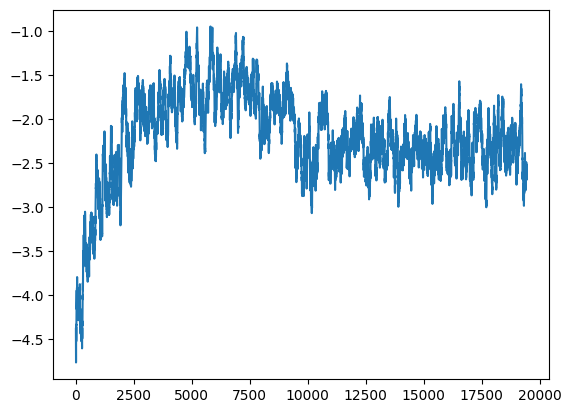

100%|██████████| 100000/100000 [07:44<00:00, 215.38it/s]


In [25]:
state_dim = env.observation_space.shape[-1]
action_dim = 4

policy_net = DQN(state_dim, action_dim)
target_net = DQN(state_dim, action_dim)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr=LR)
replay_buffer = ReplayBuffer(MEMORY_SIZE)

epsilon = EPSILON_START
epsilon_decay = (EPSILON_START - EPSILON_END) / 50000


state, _ = env.reset()
state = np.array(state, dtype=np.float32)
total_reward = 0
success_list = []

for steps in tqdm(range(100000)):

    # Epsilon-greedy policy
    if random.random() < epsilon:
        action = env.action_space.sample()
    else:
        with torch.no_grad():
            action = policy_net(torch.tensor(state)).argmax(axis=1)

    
    next_state, reward, done, truncated, info = env.step(action)
    next_state = np.array(next_state, dtype=np.float32)
    
    # print(action, reward, truncated)
    replay_buffer.push(state, action, reward, next_state, done, truncated)

    state = next_state
    total_reward += reward

    # Train the network
    for _ in range(1):
        if len(replay_buffer) > BATCH_SIZE:
            states, actions, rewards, next_states, dones, truncations = replay_buffer.sample(BATCH_SIZE)

            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            next_q_values = target_net(next_states).max(1)[0]

            # Consider truncation: If truncated but not done, allow future rewards
            mask = 1 - dones * (1 - truncations)
            target_q_values = rewards + GAMMA * next_q_values * mask

            loss = nn.functional.mse_loss(q_values, target_q_values.detach())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        

    # Update target network
    if steps % 8 == 0:
        target_net.load_state_dict(policy_net.state_dict())

    success_list += reward[done | truncated].tolist()

    # Decay epsilon
    epsilon = max(EPSILON_END, epsilon - epsilon_decay)
    # print(epsilon)

    # print(f"Episode {episode + 1}, Total Reward: {total_reward}")
    if steps % 50 == 0:
        clear_output(True)
        # plt.plot(success_list)
        plt.plot(moving_average(success_list, window_size=100))
        plt.show()


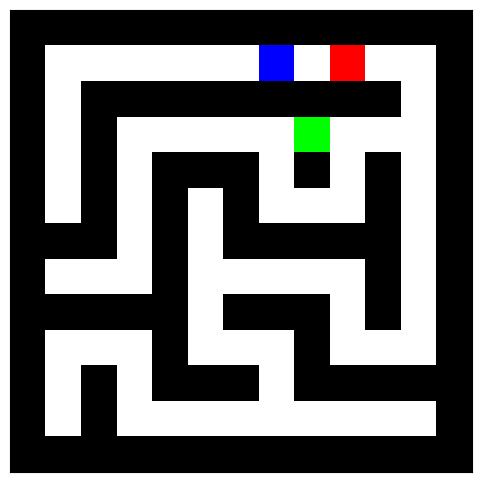

In [34]:
eval_env = make_env()

state, _ = eval_env.reset()
state = np.array(state, dtype=np.float32)

for _ in range(20):

    with torch.no_grad():
        action = policy_net(torch.tensor(state).unsqueeze(0)).argmax(axis=1)[0].item()
    
    next_state, reward, done, truncated, info = eval_env.step(action)
    next_state = np.array(next_state, dtype=np.float32)
    

    state = next_state
    # if done | truncated
    
    clear_output(True)
    eval_env.unwrapped.visualize_maze()
    

In [605]:
epsilon

0.05